<a href="https://colab.research.google.com/github/iamartinezg/About-me-/blob/main/Red_neuronal_vs_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#*Pontificia Universidad Javeriana*
# *ANALISIS DE ALGORITMOS*
#*Ivan Alejandro Martinez Gracia*


1. En el siguiente Link se encuentra un dataset: ```population and drinking data``` https://people.sc.fsu.edu/~jburkardt/datasets/regression/x20.txt

Diseniar un modelo de prediccion usando regresion lineal y un modelo de Red Neuronal Densa. Realizar un analisis comparativo entre dichos modelos.



# **REGRESION LINEAL**

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
# Cargamos la base de datos y eliminamos la columna Serial No
data = pd.read_csv('/content/sample_data/data1.csv')
data=data.drop(columns=['I'])

In [ ]:
# Lectura de los 5 primeros datos
data.head(5)

,A0,A1,A2,A3,A4,B
0,1,44,33.2,5,30,41.2
1,1,43,33.8,4,41,31.7
2,1,48,40.6,3,38,39.4
3,1,52,39.2,7,48,57.5
4,1,71,45.5,11,53,74.8


In [ ]:
# Mostrar el encabezado 
data.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'B'], dtype='object')

In [ ]:
# Revisión de datos nulos
data.isnull().sum()

A0    0
A1    0
A2    0
A3    0
A4    0
B     0
dtype: int64

In [ ]:
# Información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      46 non-null     int64  
 1   A1      46 non-null     int64  
 2   A2      46 non-null     float64
 3   A3      46 non-null     int64  
 4   A4      46 non-null     int64  
 5   B       46 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 2.3 KB


In [ ]:
# Resumen estadístico
data.describe()

,A0,A1,A2,A3,A4,B
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.0,56.260870,41.476087,11.586957,57.500000,63.493478
std,0.0,15.747218,7.044342,6.920424,22.140712,23.447979
min,1.0,27.000000,31.200000,2.000000,26.000000,28.000000
25%,1.0,44.250000,35.625000,6.250000,41.500000,48.900000
50%,1.0,55.000000,42.250000,10.000000,56.000000,57.650000
75%,1.0,65.000000,45.825000,15.750000,68.750000,75.700000
max,1.0,87.000000,56.100000,31.000000,149.000000,129.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8c5e87d0>,
      dtype=object)

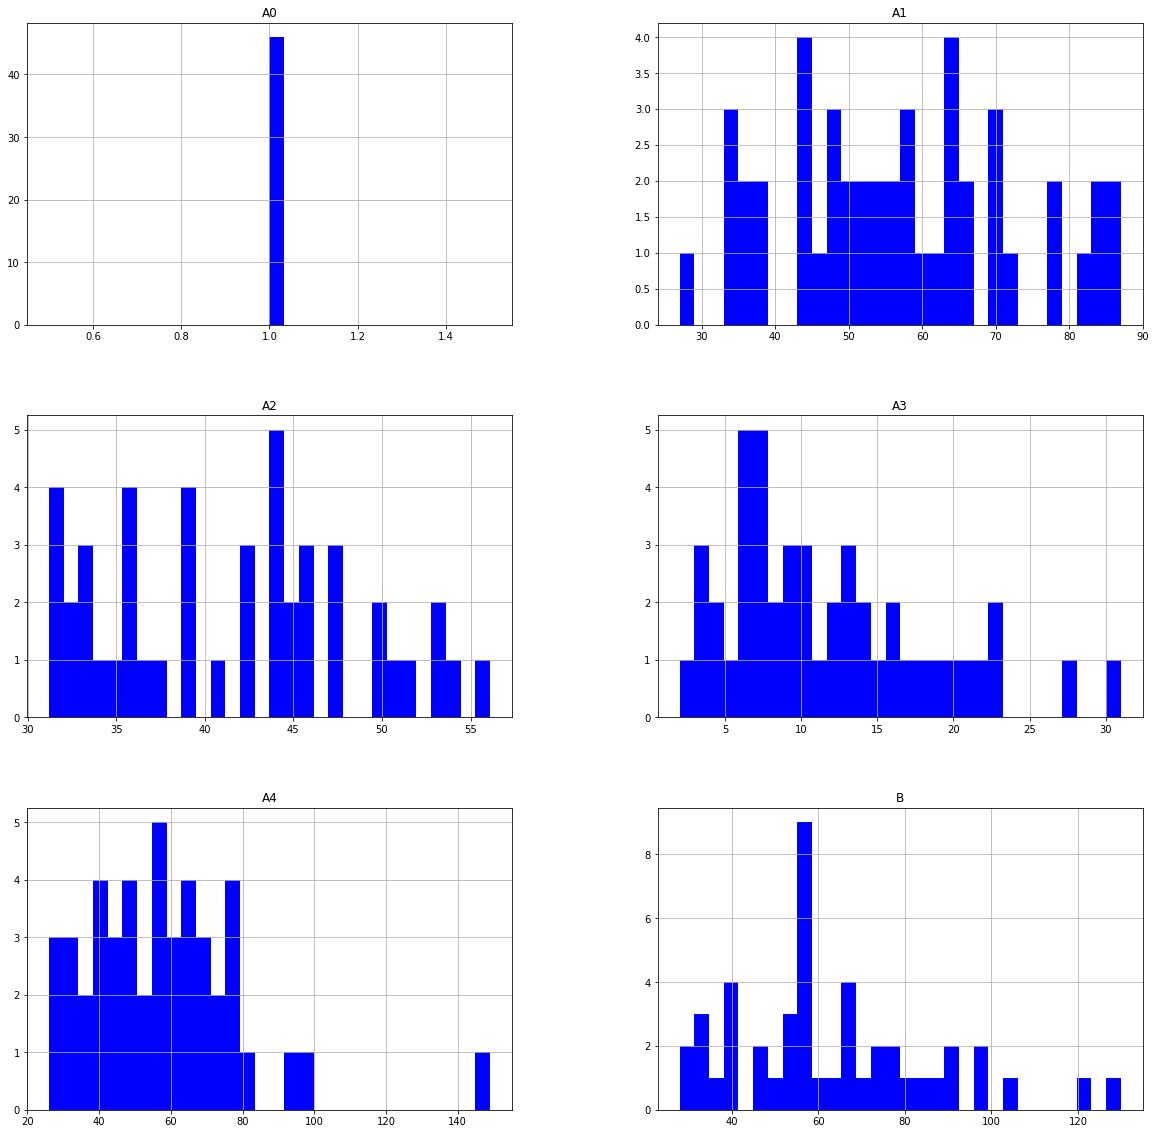

In [ ]:
# Histogramas de las variables 
data.hist(bins = 30, figsize = (20, 20), color='b')

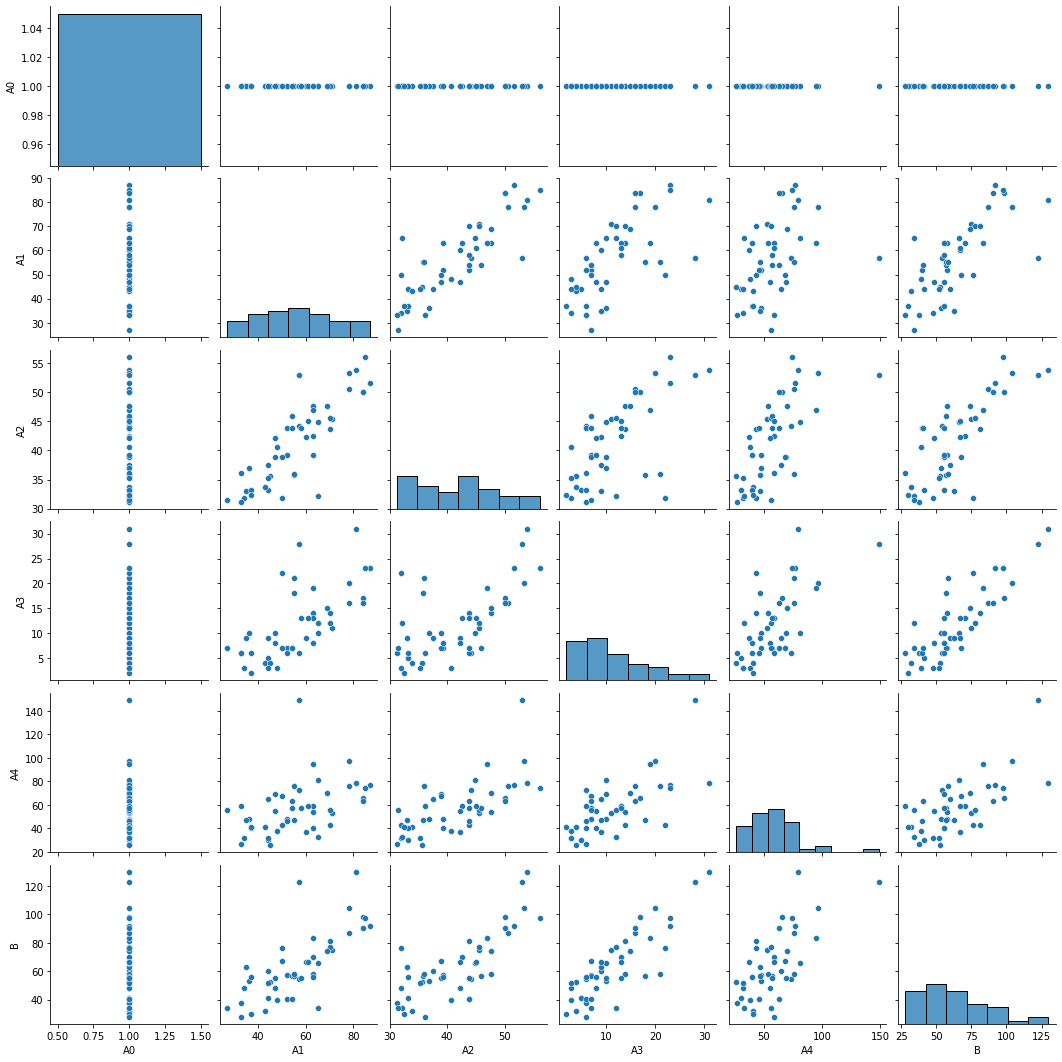

In [ ]:
# Distribución de los datos de la relación de las variables entre sí
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


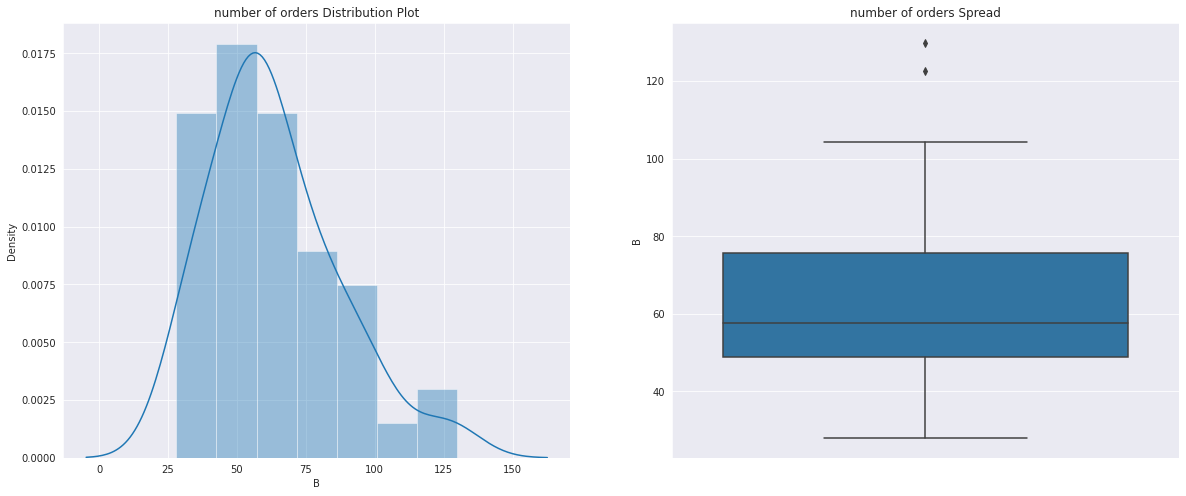

In [ ]:
# Visualización de la variable objetivo
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.B)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.B)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


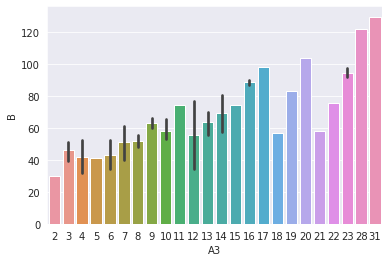

In [ ]:
# con vino
sb.barplot(data.A3,data.B)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


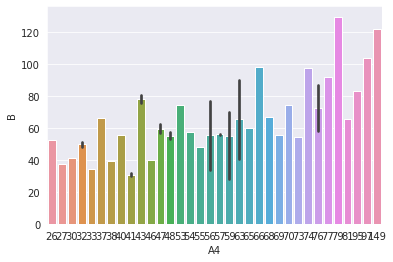

In [ ]:
# con licor fuerte
sb.barplot(data.A4,data.B)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


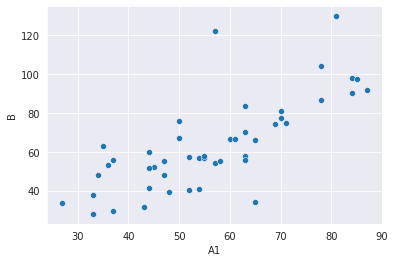

In [ ]:
# Distribución de los datos del tamaño de la población urbana según la tasa de mortalidad por cirrosis
sb.scatterplot(data.A1,data.B)

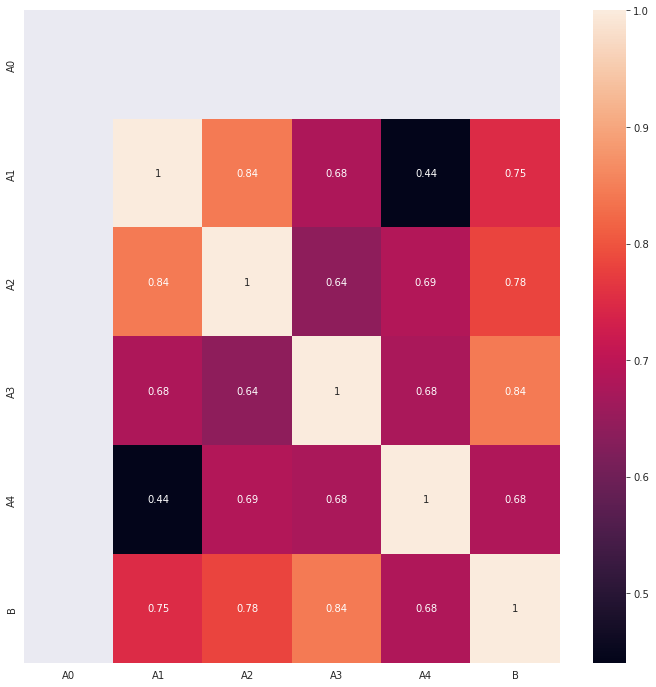

In [ ]:
# Matriz de correlación
corr_matrix = data.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Correlacion de las variables con respecto a la tasa de mortalidad por cirrosis
(data.corr()**2)["B"].sort_values(ascending = False)[1:]

A3    0.713368
A2    0.612657
A1    0.561112
A4    0.465082
A0         NaN
Name: B, dtype: float64

In [ ]:
# Mejoramos los datos
data['B']=data['B']**2

In [ ]:
# eliminar algunos valores atípicos
data = data[data.B >0.40]
data.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


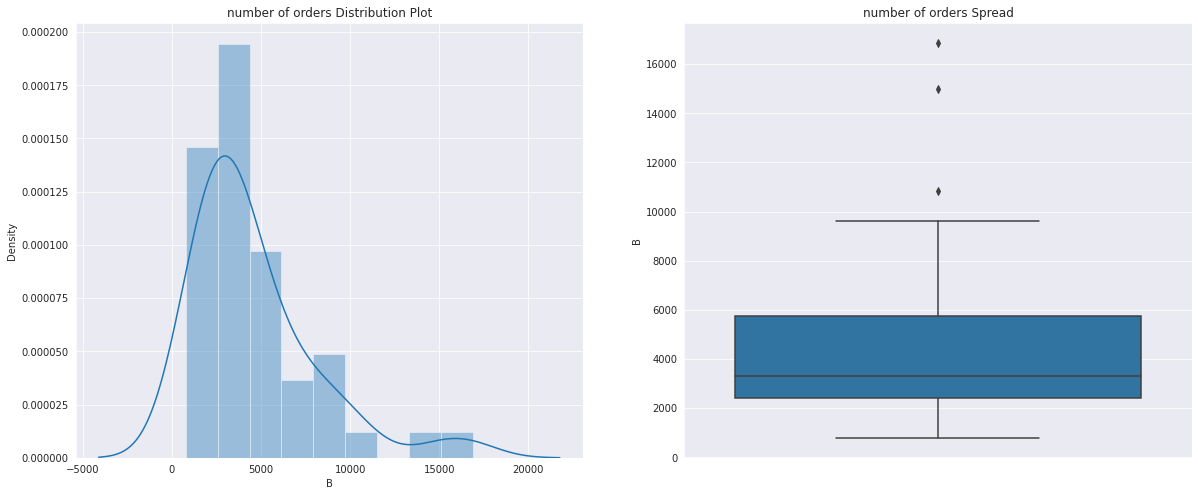

In [ ]:
# Gráficas mejoradas
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.B)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.B)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


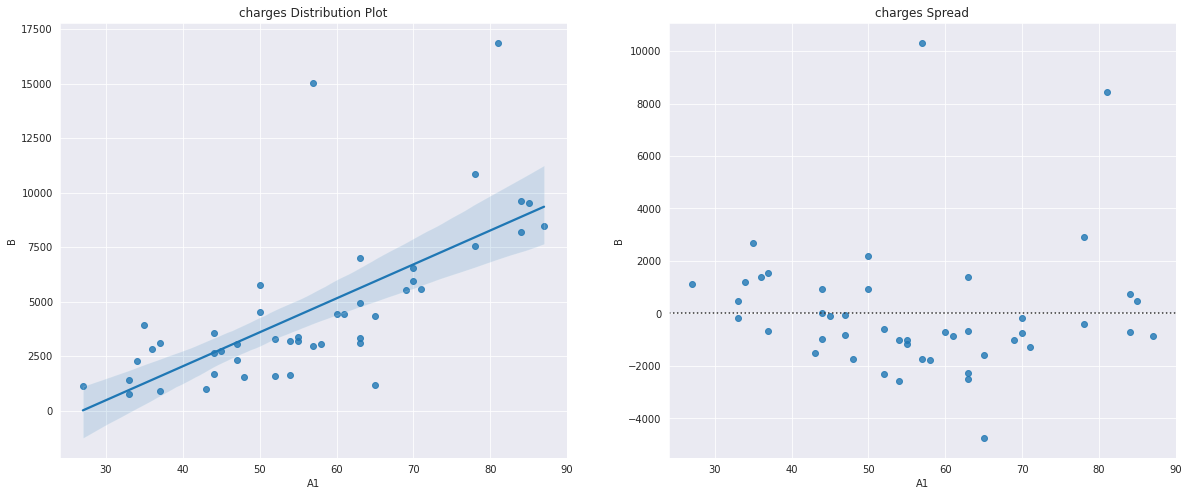

In [ ]:
# Regresión lineal y residuales del tamaño de la población urbana 
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.A1, y=data.B)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.A1, data.B)

plt.show()

In [ ]:
df = data.sample(5)
df

,A0,A1,A2,A3,A4,B
30,1,69,47.6,15,70,5520.49
28,1,37,33.2,6,40,3102.49
26,1,60,42.3,9,37,4435.56
37,1,50,31.9,22,43,5776.00
35,1,57,53.0,28,149,15006.25


In [ ]:
df1=df.iloc[:,[1,5]] # Selección de la columna de tamaño de la población urbana y la tasa de mortalidad por cirrosis
df1_x=df1.iloc[:,[0]] # establecer A1 como vector X
x=df1_x.iloc[:,0] # Convertir el objeto a una columna numérica
x=pd.to_numeric(x)

In [ ]:
df1_y=df1.iloc[:,[1]] # establecer la tasa de mortalidad por cirrosis  como vector Y
y=df1_y.iloc[:,0] # Convertir el objeto a columna numérico

In [ ]:
# Calculamos la media del vector x
df1_x_mean=np.mean(df1_x)
df1_x_mean

A1    54.6
dtype: float64

In [ ]:
# Calculamos la desviación de x 
deviation_x=[]
for i in x:
    deviation_x.append(i-df1_x_mean)
deviation_x

[A1    14.4
 dtype: float64, A1   -17.6
 dtype: float64, A1    5.4
 dtype: float64, A1   -4.6
 dtype: float64, A1    2.4
 dtype: float64]

# **RED NEURONAL**

In [ ]:
# Iteramos en los archivos para extraer la maxima potencia
data = pd.read_csv('/content/sample_data/data1.csv')
data=data.drop(columns=['I'])
A1 =[]
A2 =[]
A3 =[]
A4 =[]
B = []
A1= data.A1
A2= data.A2
A3= data.A3
A4= data.A4
B= data.B
# Creacion del DF
dataframe_pot = pd.DataFrame()
dataframe_pot['A1'] = A1
dataframe_pot['A2'] = A2
dataframe_pot['A3'] = A3
dataframe_pot['A4'] = A4
dataframe_pot['B'] = B

In [ ]:
dataframe_pot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      46 non-null     int64  
 1   A2      46 non-null     float64
 2   A3      46 non-null     int64  
 3   A4      46 non-null     int64  
 4   B       46 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.9 KB


In [ ]:
# Guardar el archivo local
dataframe_pot.to_csv('Data_pot.csv')

In [ ]:
train_1, test_1 = train_test_split(dataframe_pot, test_size = 0.30)
train_1.to_csv('train_pot.csv')
test_1.to_csv('test_pot.csv')

In [ ]:
A3= train_1['A3']
A4= train_1['A4']


entrada = np.array(np.column_stack((A3,A4)), dtype='float')

B = train_1['B']
salida = np.array(np.transpose(B), dtype='float')

In [ ]:
oculta1 = tf.keras.layers.Dense(units=10, input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=10)
output = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,  oculta2, output])

In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento ... ")
historial = modelo.fit(entrada,salida, epochs=100, verbose=False)
print("Modelo entranado!")

Comenzando entrenamiento ... 
Modelo entranado!


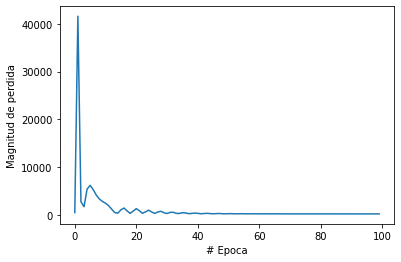

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

Comenzando entrenamiento ... 
Modelo entranado!


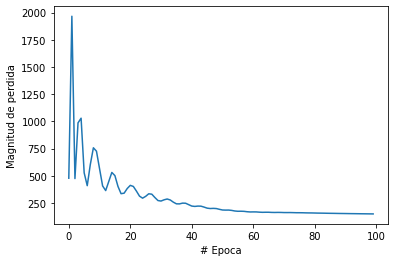

In [ ]:
A3= train_1['A3']
A4= train_1['A4']

entrada = np.array(np.column_stack((A3,A4)), dtype='float')

B = train_1['B']

##############################################################

salida = np.array(np.transpose(B), dtype='float')
oculta1 = tf.keras.layers.Dense(units=5, input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=2)
output = tf.keras.layers.Dense(units=1)

###############################################################
modelo = tf.keras.Sequential([oculta1,  oculta2, output])
###############################################################

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)
###############################################################

print("Comenzando entrenamiento ... ")
historial = modelo.fit(entrada,salida, epochs=100, verbose=False)
print("Modelo entranado!")
###############################################################
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

**2. Generar un analisis de sentimientos sobre el impacto que tendra el mundial de futbol Qatar 2022.**

In [ ]:
import tweepy
 
# Add Twitter API key and secret
consumer_key = "NoNMAmK0JZ3h5DKQoSJKq0rz7"
consumer_secret  = "ya8nxQjMYpPXyii6pGHkIRcazDPyCOnr6lLonucpWG3Lrkab8P"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
 
# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [ ]:
!pip install -q transformers

     |████████████████████████████████| 5.5 MB 18.0 MB/s 
     |████████████████████████████████| 182 kB 32.7 MB/s 
     |████████████████████████████████| 7.6 MB 50.3 MB/s 


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [ ]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(data)

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.9903131723403931},
 {'label': 'NEG', 'score': 0.9797351360321045}]

In [ ]:
specific_model = pipeline(model="finiteautomata/beto-sentiment-analysis")
data = ["El equipo del Millonarios apesta", "Estoy contento de jugar"]
specific_model(data)

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'NEG', 'score': 0.9992181062698364},
 {'label': 'POS', 'score': 0.9983267188072205}]

In [ ]:
!pip install -q transformers tweepy wordcloud matplotlib

In [ ]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
   while True:
       try:
           yield cursor.next()
       except tweepy.RateLimitError:
           print('Reached rate limite. Sleeping for >15 minutes')
           time.sleep(15 * 61)
       except StopIteration:
           break
 
# Define the term you will be using for searching tweets
query = '"mundial de futbol Qatar 2022" OR "QATAR2022" OR "mundial fifa 2022"  -filter:retweets'
query = query + ' -filter:retweets'
 
# Define how many tweets to get from the Twitter API
count = 1000
 
# Let's search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search,
                       q=query,
                       tweet_mode='extended',
                       lang='es',
                       result_type="recent").items(count))


In [ ]:
from transformers import pipeline
 
# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/beto-sentiment-analysis")
 
# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in search:
   try:
     content = tweet.full_text
     sentiment = sentiment_analysis(content)
     tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
 
   except:
     pass

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
import pandas as pd
 
# Load the data in a dataframe
df = pd.DataFrame(tweets)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

,tweet,sentiment
0,"Si fuera argentino o brasileño pagan una millonada por él. Sin duda Alexis Vega está convertido en un jugadorazo, ojalá emigre al futbol europeo. #Qatar2022 https://t.co/SOimgZJX3q",POS


,tweet,sentiment
4,"🏆⚽️🇦🇷 | #DeportesRED92 | #Qatar2022 | \n\nLa Red 92 junto a Diario Hoy llegaron a Qatar para acompañar a la Selección Argentina \n\nLas primeras imágenes desde el aeropuerto, con hinchas de todo el mundo \n\nMás info en https://t.co/SPQ4mFmw1H https://t.co/9d8EVHqxNE",NEU


,tweet,sentiment
1,"Ésto sí que es Raza Superior.\nMirá como el #NinoNoqui, el seguidor de #CFKGolpista, puede, y hasta viajó a #Qatar2022 sin siquiera haber trabajado un sólo puto día!!\nLabura nena, o sé como Toto Massa ✌🏿 https://t.co/KFagA2wggv",NEG


sentiment
NEG    187
NEU    510
POS    303
dtype: int64


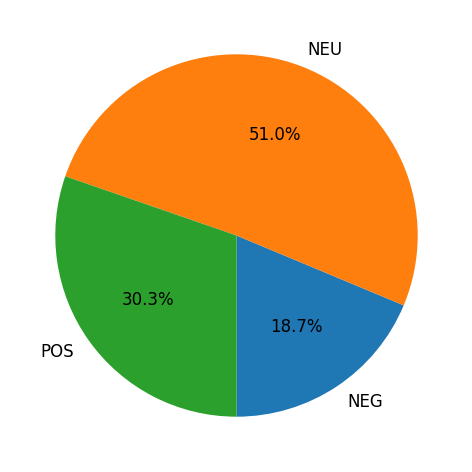

In [ ]:
import matplotlib.pyplot as plt
# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words_sp = set(stopwords.words('spanish'))

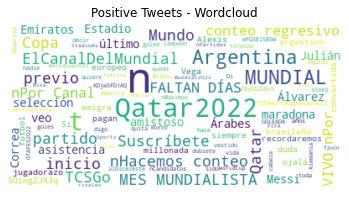

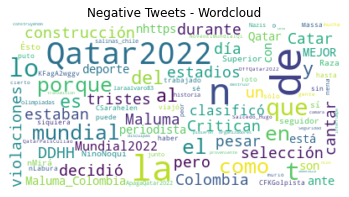

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT", "NoticiaW"] + list(stop_words_sp)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
